<a href="https://colab.research.google.com/github/Pai-Ya-Ting/Word-cloud/blob/main/Word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # !pip install grequests
# !pip install ckiptagger
# !pip install tensorflow
# !pip install gdown
# !pip install wordcloud
# !pip install nltk

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from ckiptagger import data_utils, WS, POS, NER
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
# data_utils.download_data_gdown("./")
ws = WS("./data")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:903: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [ ]:
with open('QQ.txt') as f:
  stop = f.read()
# stop

In [ ]:
head = {
"Accept": "application/json, text/javascript, */*; q=0.01",
"Accept-Encoding": "gzip, deflate, br",
"Accept-Language": "en-US,en;q=0.9",
"Connection": "keep-alive",
# "Cookie": "__auc=12d83772176273dac7645b2ebed; luauid=1510229721; _hjid=6b1bb01c-72cb-48be-b471-2f05341822e9; _hp2_id.3192618648=%7B%22userId%22%3A%223730355910639175%22%2C%22pageviewId%22%3A%22303623585700576%22%2C%22sessionId%22%3A%226306454053891299%22%2C%22identity%22%3Anull%2C%22trackerVersion%22%3A%224.0%22%7D; AC=1616241544; EPK=16b188c92634885880bf18e245de9c8fb; R_PF=%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C2021032048901500000002%2C%2C%2C; _ga_DFVEWNDC9H=GS1.1.1616606772.2.0.1616606772.0; _ga_M0JWV68VS9=GS1.1.1618123513.3.1.1618123602.0; ALGO_EXP_6019=C; job_same_ab=2; TS016ab800=01180e452dc47e06c4953f904450c8d85e973f7069d6fe2aa999c40a2350f7ae39cefb84a6aca92b3a83b8022deffb6caacaa1e959; __asc=7b293c96178d6c090c6578d7b77; _gid=GA1.3.1471086961.1618510648; lup=1510229721.5001489413863.4623532291991.1.4640712161167; lunp=4623532291991; _ga=GA1.3.1313638744.1606976122; _ga_W9X1GB1SVR=GS1.1.1618510647.10.1.1618510775.60; _ga_FJWMQR9J2K=GS1.1.1618510647.10.1.1618510775.60",
"Host": "www.104.com.tw",
"Referer": "https://www.104.com.tw/jobs/search/?ro=0&keyword=%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8&expansionType=area,spec,com,job,wf,wktm&jobsource=2018indexpoc",
"sec-ch-ua": '" Not A;Brand";v="99", "Chromium";v="90", "Google Chrome";v="90"',
"sec-ch-ua-mobile": "?0",
"Sec-Fetch-Dest": "empty",
"Sec-Fetch-Mode": "cors",
"Sec-Fetch-Site": "same-origin",
"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.72 Safari/537.36",
"X-Requested-With": "XMLHttpRequest"
} 

cookies= {"Cookie": "__auc=12d83772176273dac7645b2ebed; luauid=1510229721; _hjid=6b1bb01c-72cb-48be-b471-2f05341822e9; _hp2_id.3192618648=%7B%22userId%22%3A%223730355910639175%22%2C%22pageviewId%22%3A%22303623585700576%22%2C%22sessionId%22%3A%226306454053891299%22%2C%22identity%22%3Anull%2C%22trackerVersion%22%3A%224.0%22%7D; AC=1616241544; EPK=16b188c92634885880bf18e245de9c8fb; R_PF=%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C%2C2021032048901500000002%2C%2C%2C; _ga_DFVEWNDC9H=GS1.1.1616606772.2.0.1616606772.0; _ga_M0JWV68VS9=GS1.1.1618123513.3.1.1618123602.0; ALGO_EXP_6019=C; job_same_ab=2; TS016ab800=01180e452dc47e06c4953f904450c8d85e973f7069d6fe2aa999c40a2350f7ae39cefb84a6aca92b3a83b8022deffb6caacaa1e959; __asc=7b293c96178d6c090c6578d7b77; _gid=GA1.3.1471086961.1618510648; lup=1510229721.5001489413863.4623532291991.1.4640712161167; lunp=4623532291991; _ga=GA1.3.1313638744.1606976122; _ga_W9X1GB1SVR=GS1.1.1618510647.10.1.1618510775.60; _ga_FJWMQR9J2K=GS1.1.1618510647.10.1.1618510775.60"}

In [ ]:
def get_en(s):
  uncn = re.compile(r'[\u0061-\u007a,\u0020]')
  en_senc = "".join(uncn.findall(s.lower()))
  en_senc = word_tokenize(en_senc)

  stopwords = nltk.corpus.stopwords.words('english')
  stopwords.append('newWord')
  stopwords.extend(['experience', 'work', 'ability'])

  en_senc = [i for i in en_senc if not i in stopwords]

  cn = re.compile(r'[\u4e00-\u9fa5]')
  cn_senc = ws([''.join(cn.findall(s))])[0]
  cn_senc = [i for i in cn_senc if i not in stop]
  l = [cn_senc, en_senc]

  return list(set(sum(l, [])))

In [ ]:
keyword = "python 深度學習"

In [ ]:
# https://www.1111.com.tw/search/job?ks={keyword}

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import warnings
import re
warnings.filterwarnings('ignore')
start_time = time.time()
article = []
areas = []
for i in range(1, 6): 
    url=f"https://www.104.com.tw/jobs/search/?keyword={keyword}&order=1&page={i}&jobsource=2018indexpoc&ro=0"
    resp = requests.get(url, headers = head, cookies = cookies)
    soup = BeautifulSoup(resp.text, 'lxml')
    blocks = soup.find_all("div", {"class": "b-block__left"})  
    for block in blocks:

        skill = block.find("p", {"class": "job-list-item__info b-clearfix b-content"})
        area = block.select('.b-list-inline.b-clearfix.job-list-intro.b-content')[0].find('li').get_text()
        if skill is None:
            continue
        areas.append(area)
        w = get_en(skill.getText())
        # print(skill.getText())
        article.extend(w)
    time.sleep(0.5)
print("花費：" + str(time.time() - start_time) + "秒")

花費：28.30366325378418秒


In [ ]:
# article

In [ ]:
rule = re.compile('ur"[^a-zA-Z\u4e00-\u9fa5]"')
a = [rule.sub('',line) for line in article]
b = [re.sub('\s+', '', line) for line in a]
text = ' '.join(b)

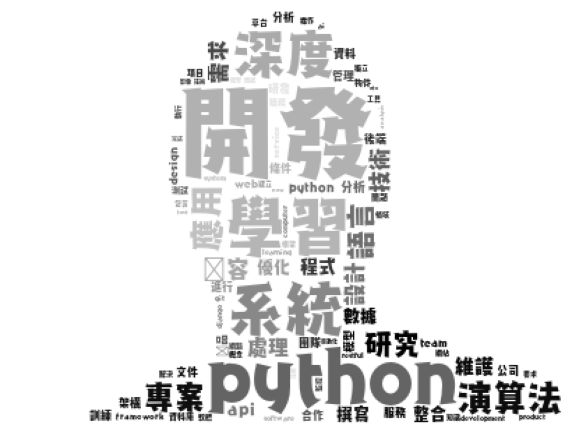

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

plt.figure(figsize=(10,8))
backgroud_Image = np.array(Image.open("jobs.png"))

wc = WordCloud(
  background_color='white',  
  mask=backgroud_Image,  
  font_path='font.otf',  
  max_words=2000,  
  stopwords=stop,  
  max_font_size=150,  
  random_state=1,  
  scale=1 
)

wc.generate(text)
# wc.generate_from_frequencies(frequencies=Counter(text))

image_colors = ImageColorGenerator(backgroud_Image)
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.show()
wc.to_file("Demo.png")

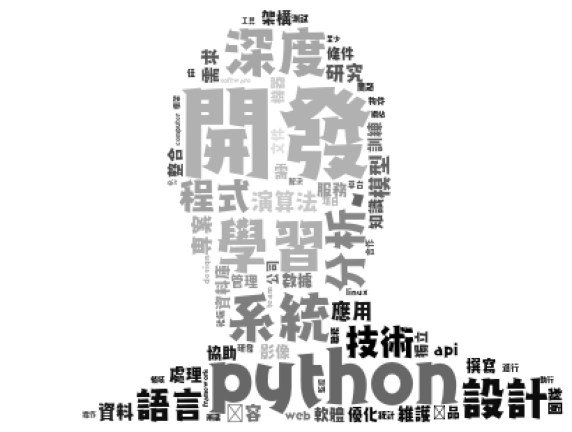

In [ ]:
from collections import Counter, OrderedDict

plt.figure(figsize=(10,8))
wc.generate_from_frequencies(frequencies=OrderedDict(Counter(b).most_common()))
image_colors = ImageColorGenerator(backgroud_Image)
plt.imshow(wc.recolor(color_func=image_colors))
# plt.imshow(wc)
# 隐藏图像坐标轴
plt.axis("off")
# 展示图片
plt.show()
wc.to_file("Demo2.png")